### 6.3 Geographic Visualization 

#### This script contains the following:
##### 1. Import data and libraries
##### 2. Data wrangling & Data cleaning
##### 3. Conduct consistency checks
##### 4. Plotting a choropleth

### 1. Import data and libraries

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium
import json

In [11]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [17]:
# Import ".json" file for the U.S. 
country_geo = r'C:\Users\Daniella\ACH6\us-states.json'

In [21]:
country_geo

'C:\\Users\\Daniella\\ACH6\\us-states.json'

In [19]:
# That's just in case you want to look at the JSON file contents here too:
f = open(r'C:\Users\Daniella\ACH6\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [23]:
# Define path
path = r'C:\Users\Daniella\ACH6'
#data set
df_gun = pd.read_csv(os.path.join(path, 'Prepared Data', 'gun violence clean.csv')) 

In [25]:
df_gun.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Nan,...,-79.8559,Unknown,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,Unknown,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Unknown,Unknown
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,Nan,...,-118.333,Unknown,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,Unknown,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,...,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,Unknown,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,Nan,...,-104.802,Unknown,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,Unknown,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,...,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


### 2. Data wrangling & Data cleaning

In [33]:
# Checking for missing values:
missing_values = df_gun.isnull().sum()
print(missing_values)

Unnamed: 0                  0
incident_id                 0
date                        0
state                       0
city_or_county              0
address                     0
n_killed                    0
n_injured                   0
congressional_district      0
gun_stolen                  0
gun_type                    0
incident_characteristics    0
latitude                    0
location_description        0
longitude                   0
n_guns_involved             0
participant_age             0
participant_age_group       0
participant_gender          0
participant_relationship    0
participant_status          0
participant_type            0
state_house_district        0
state_senate_district       0
dtype: int64


In [35]:
# Drop unnecessary columns: 
df_gun = df_gun.drop(columns=["Unnamed: 0"])

In [39]:
# Create a new DataFrame with the selected columns
df_states = df_gun[['state', 'n_killed', 'n_injured']]

In [41]:
print(df_states.head())

            state  n_killed  n_injured
0    Pennsylvania         0          4
1      California         1          3
2            Ohio         1          3
3        Colorado         4          0
4  North Carolina         2          2


In [47]:
# Aggregate data by state
state_data = df_states.groupby('state').agg({
    'n_killed': 'sum',
    'n_injured': 'sum'
}).reset_index()

In [53]:
print(state_data.head())

        state  n_killed  n_injured  total_victims
0     Alabama      1880       2998           4878
1      Alaska       267        325            592
2     Arizona      1094       1096           2190
3    Arkansas       773       1347           2120
4  California      5562       7644          13206


In [51]:
state_data['total_victims'] = state_data['n_killed'] + state_data['n_injured']

In [67]:
print(data['features'][5])

{'type': 'Feature', 'id': 'CO', 'properties': {'name': 'Colorado'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-107.919731, 41.003906], [-105.728954, 40.998429], [-104.053011, 41.003906], [-102.053927, 41.003906], [-102.053927, 40.001626], [-102.042974, 36.994786], [-103.001438, 37.000263], [-104.337812, 36.994786], [-106.868158, 36.994786], [-107.421329, 37.000263], [-109.042503, 37.000263], [-109.042503, 38.166851], [-109.058934, 38.27639], [-109.053457, 39.125316], [-109.04798, 40.998429], [-107.919731, 41.003906]]]}}


In [78]:
print(df_states['state'].unique())

['Pennsylvania' 'California' 'Ohio' 'Colorado' 'North Carolina' 'Oklahoma'
 'New Mexico' 'Louisiana' 'Maryland' 'Tennessee' 'Missouri' 'Illinois'
 'Delaware' 'Utah' 'Michigan' 'Georgia' 'Indiana' 'Mississippi' 'New York'
 'Florida' 'Washington' 'South Carolina' 'Arizona' 'Kentucky' 'New Jersey'
 'Virginia' 'Wisconsin' 'Rhode Island' 'Texas' 'Alabama' 'Kansas'
 'Connecticut' 'West Virginia' 'Minnesota' 'Nevada' 'Nebraska'
 'Massachusetts' 'Hawaii' 'New Hampshire' 'Iowa' 'Alaska' 'Arkansas'
 'Idaho' 'Oregon' 'Wyoming' 'Maine' 'North Dakota' 'Montana' 'Vermont'
 'South Dakota']


In [74]:
# Check for mismatches
geojson_states = [feature['properties']['name'] for feature in data['features']]
missing_states = set(df_states['state']) - set(geojson_states)

print("States in dataset but not in GeoJSON:", missing_states)

States in dataset but not in GeoJSON: {'District of Columbia'}


In [192]:
df_states = df_states[df_states['state'] != 'District of Columbia']

### 3. Conduct consistency checks

In [204]:
# Check for missing values
print(df_states.isnull().sum()) 

state        0
n_killed     0
n_injured    0
dtype: int64


##### Duplicates check

In [209]:
dups = df_states.duplicated()

In [211]:
dups.shape # no dups

(236482,)

##### Extreme values checks

In [238]:
sns.histplot(df_states['n_killed'], bins=20, kde = True) # shows extreme values for 'killed'

<Axes: xlabel='n_killed', ylabel='Count'>

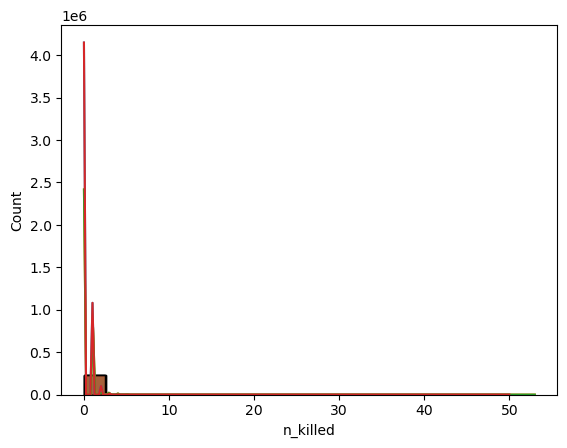

In [240]:
plt.show()

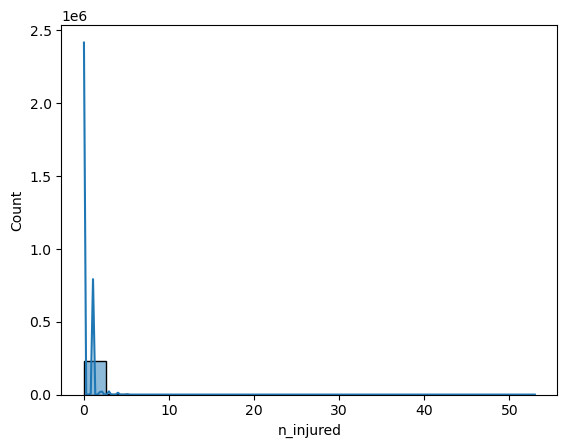

In [252]:
sns.histplot(df_states['n_injured'], bins=20, kde=True) # shows extreme values for 'n_injured'
plt.show()

##### Observations:
Both histograms show very high counts near zero. The tall peak near the zero suggests that most data points have very few people killed or injured. However, both histograms also show spikes for higher values, suggesting a small number of incidents with an unusually large numbers of deaths or injuries. This could indicate outliers or rare but extremely impactful events, like a mass shootings for example.

In [260]:
# Plot histograms for 'n_killed' and zoom in to focus on the majority of the data
sns.histplot(df_states['n_killed'], bins=20, kde=True, color='red')

<Axes: xlabel='n_killed', ylabel='Count'>

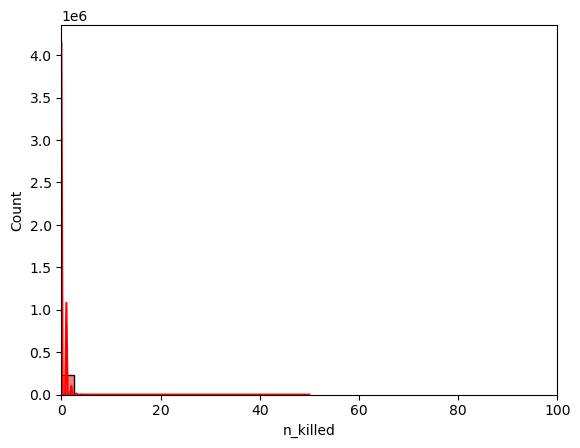

In [262]:
# Set the x-axis limit to focus on a range
plt.xlim(0, 100)
plt.show()

In [264]:
# Plot histograms for 'n_injured' and zoom in to focus on the majority of the data
sns.histplot(df_states['n_injured'], bins=20, kde=True, color='blue')

<Axes: xlabel='n_injured', ylabel='Count'>

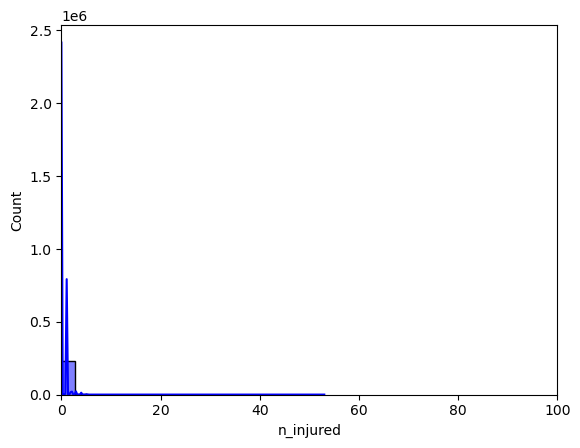

In [266]:
# Set the x-axis limit to focus on a range
plt.xlim(0, 100)
plt.show()

##### Observations:
Used a 0 to 100 range to focuse on the majority of incidents and exclude extreme outliers to try to visualize the more typical patterns.

### 4. Plotting a choropleth

In [82]:
# Create a base map of the US:
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Add a choropleth layer
folium.Choropleth(
    geo_data=data,
    name="choropleth",
    data=state_data,
    columns=["state", "n_killed"],  # Replace 'n_killed' with 'total_victims' if preferred
    key_on="feature.properties.name",  # This key depends on the GeoJSON file; adjust if necessary
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of People Killed in Gun Violence",
).add_to(m)

# Add layer control (optional)
folium.LayerControl().add_to(m)

In [124]:
# Save or display the map
m.save("people_killed_map.html")

In [126]:
m

In [154]:
# Create a base map
m_injured = folium.Map(location=[37.8, -96], zoom_start=4)

In [176]:
# Add a choropleth layer for injuries (correct data column)
folium.Choropleth(
    geo_data=data,  # Make sure this is your GeoJSON data
    name="choropleth",
    data=state_data,  # Ensure this is your correctly structured DataFrame
    columns=["state", "n_injured"],  # This should be 'n_injured'
    key_on="feature.properties.name",  # This should match the state name in the GeoJSON
    fill_color="PuBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of People Injured in Gun Violence",  # Correct the legend name
).add_to(m_injured)

In [178]:
folium.LayerControl().add_to(m_injured)

In [198]:
m_injured.save("people_injured_map.html")

In [188]:
m_injured

##### Observations:
The data shows that bigger states like California, Texas, and Florida tend to have the highest numbers of both deaths and injuries, which makes sense given their larger populations and the scale of incidents. Some states, like Illinois, have way more injuries than deaths, suggesting that the accidents there might be less deadly. Smaller states, like Vermont and Wyoming have much lower numbers probably because of fewer incidents or smaller populations.

In [164]:
print(state_data.head())

        state  n_killed  n_injured  total_victims
0     Alabama      1880       2998           4878
1      Alaska       267        325            592
2     Arizona      1094       1096           2190
3    Arkansas       773       1347           2120
4  California      5562       7644          13206


In [172]:
state_data.columns

Index(['state', 'n_killed', 'n_injured', 'total_victims'], dtype='object')

In [275]:
#Export data frame:
df_gun.to_csv(os.path.join(path, 'Prepared Data', 'states_killed_injured.csv'))